In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import fft #FFT package from scipy
from sklearn.decomposition import PCA #PCA routine from Sci-Kit Learn
import pywt # pywavelets
from scipy.ndimage import gaussian_filter 

In [2]:
def Data_Frame(data_name):
    """
    Helper function to load a pandas DataFrame from a .txt file such as the one provided in the project.
    Arguments:
    data_name : string, filename
    """
    
    data_frame=pd.read_csv(data_name,sep=None,engine='python')
    log_freq=data_frame['Log Freq'][0] # get the sampling rate (Hz) from the dataset column, supposing it's uniform through the data acquisition/
    data_frame['time_s'] = np.arange(0,data_frame.shape[0])/log_freq # build the time axis in seconds
    data_frame=data_frame.set_index('time_s')
    data_frame=data_frame.drop(columns=['Log Mode','Log Freq','Timestamp','qw','qi','qj','qk']) # we will drop quaternions (not needed for frequency analysis)

    
    return data_frame,log_freq

In [3]:
#1_Stave_supine_static.txt
#2_Mattress_supine.txt
#3_Subject_sitting_chair.txt
#4_Chest_sweater.txt
#5_Under_chair.txt



df2_init,sampling_rate=Data_Frame("4_Chest_sweater.txt")
print("Dataset sampling rate: {} Hz".format(sampling_rate))
df2_init

Dataset sampling rate: 100 Hz


,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,MagnX,MagnY,MagnZ
time_s,,,,,,,,,
0.00,687.836,380.823,580.354,-7.926829,8.048780,0.975610,-592,122,-113
0.01,-812.703,-108.946,726.876,-11.707320,-81.829270,8.780488,125,60,-128
0.02,-812.520,-108.824,733.952,-37.073170,-145.487800,14.756100,123,59,-136
0.03,-787.144,-45.628,616.954,-56.341460,-174.634200,23.048780,118,58,-145
0.04,-800.259,-137.433,411.689,-1.097561,37.073170,1.341463,113,57,-157
...,...,...,...,...,...,...,...,...,...
149.33,-890.722,-81.008,446.764,-2.682927,2.926829,0.365854,144,47,-50
149.34,-885.964,-76.006,459.025,-3.902439,3.292683,0.365854,146,45,-51
149.35,-879.681,-77.714,475.068,-3.048780,2.804878,0.365854,144,46,-54


In [4]:
df2_init.describe()

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,MagnX,MagnY,MagnZ
count,14938.000000,14938.000000,14938.000000,14938.000000,14938.000000,14938.000000,14938.000000,14938.000000,14938.000000
mean,-786.333273,-72.738192,636.756491,-2.817850,1.601171,0.287538,116.943634,42.895702,-125.815035
std,20.746661,15.663502,25.743684,2.073793,4.413089,0.469316,7.876135,4.863274,8.787037
min,-911.279000,-178.730000,264.984000,-172.195100,-174.634200,-10.243900,-592.000000,29.000000,-159.000000
25%,-795.562000,-81.923000,623.847000,-3.292683,0.853659,0.121951,113.000000,39.000000,-131.000000
50%,-783.850000,-72.346000,640.378000,-2.804878,1.463415,0.243902,116.000000,43.000000,-127.000000
75%,-775.554000,-62.159000,653.127000,-2.317073,2.195122,0.487805,120.000000,46.000000,-122.000000
max,687.836000,380.823000,755.607000,44.634150,154.756100,23.048780,146.000000,122.000000,-50.000000


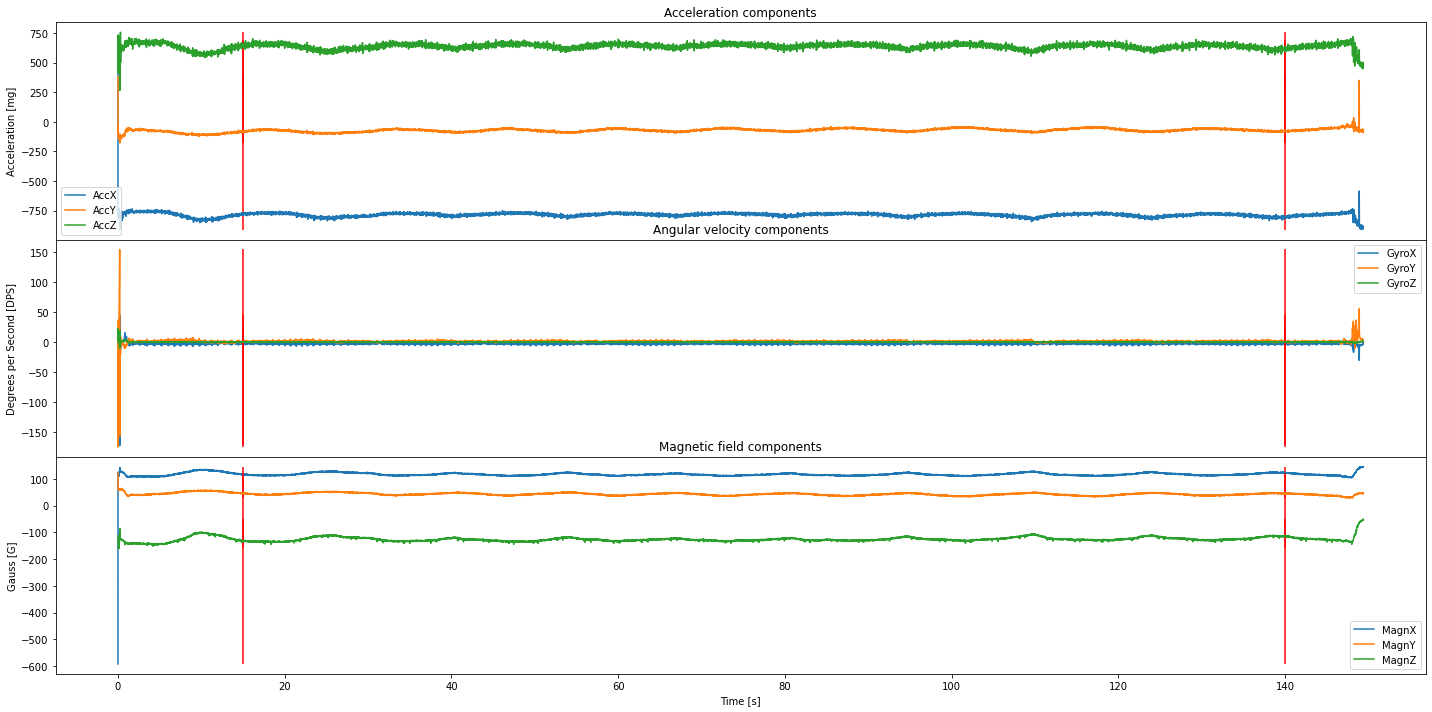

In [5]:
# now let's look at the three components of the vectors
acc_columns2 = ['AccX','AccY','AccZ']
gyro_columns2 = ['GyroX','GyroY','GyroZ']
magn_columns2 = ['MagnX','MagnY','MagnZ']

# we define the time-window based on a previous dataset exploration, in order to have the timestamp already represented on the plot
timestamp1 = 15
timestamp2 = 140

fig,axs = plt.subplots(3,1,sharex=True,figsize=[20,10],gridspec_kw={'hspace': 0})
# plot the acceleration vectors
axs[0].set_title('Acceleration components')
for acc in acc_columns2:
    axs[0].vlines(timestamp1,df2_init[acc].min(),df2_init[acc].max(),color='red')
    axs[0].vlines(timestamp2,df2_init[acc].min(),df2_init[acc].max(),color='red')
    axs[0].plot(df2_init.index,df2_init[acc],label=acc)
    axs[0].set_ylabel('Acceleration [mg]')
# plot the angular velocity components
axs[1].set_title('Angular velocity components')
for gyro in gyro_columns2:
    axs[1].vlines(timestamp1,df2_init[gyro].min(),df2_init[gyro].max(),color='red')
    axs[1].vlines(timestamp2,df2_init[gyro].min(),df2_init[gyro].max(),color='red')
    axs[1].plot(df2_init.index,df2_init[gyro],label=gyro)
    axs[1].set_ylabel('Degrees per Second [DPS]')
# plot the magnetic field components
axs[2].set_title('Magnetic field components')
for magn in magn_columns2:
    axs[2].vlines(timestamp1,df2_init[magn].min(),df2_init[magn].max(),color='red')
    axs[2].vlines(timestamp2,df2_init[magn].min(),df2_init[magn].max(),color='red')
    axs[2].plot(df2_init.index,df2_init[magn],label=magn)
    axs[2].set_ylabel('Gauss [G]')
for ax in axs:   ax.legend()
axs[-1].set_xlabel('Time [s]')
fig.tight_layout()
plt.show()

In [6]:
# let's restrict our working time window to the one presented in the plots
df2 =df2_init.loc[timestamp1:timestamp2] # working on the 6s-71s subset
# let's already subtract the offset given by the mean

df2=df2-df2.mean()
#df = (df-df.mean())/df.std() ###TRY WITH STANDARDIZATION

In [7]:
def sensor_plot(data_frame, sensor, title, unit):
    """
    Helper function to plot a sensor's components.
    title : string
    unit : string 
    sensor : list of 3 string
    """
    figure, axes = plt.subplots(1, 3, figsize=(22,3))
    figure.suptitle(title)    
    colors = ['C0','C1','C2']

    for i in range(3):
        data_frame.plot(ax=axes[i],y=sensor[i], ylabel= unit, xlabel='time [s]',color=colors[i])
    

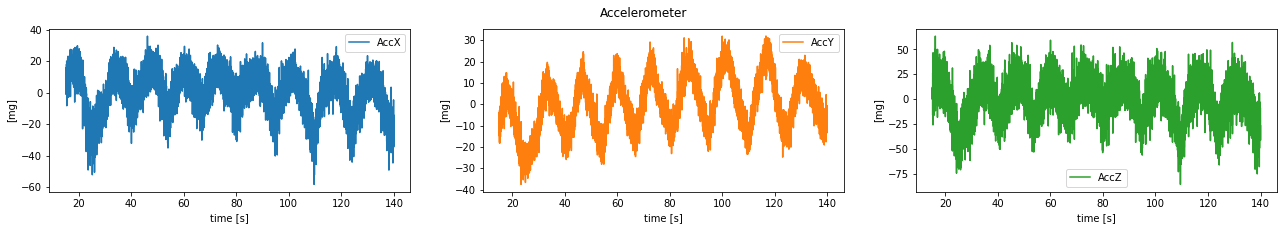

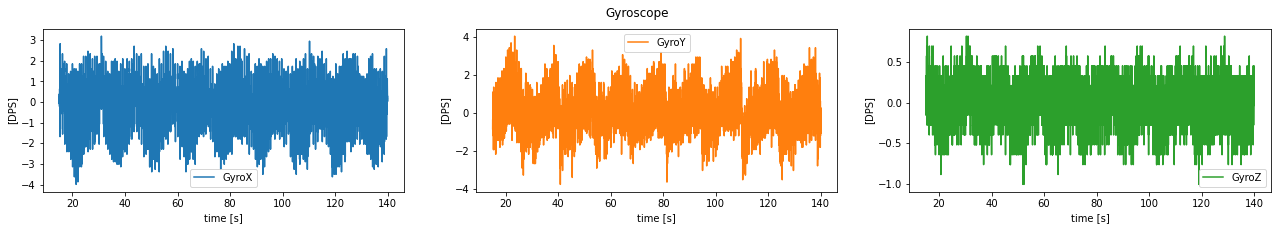

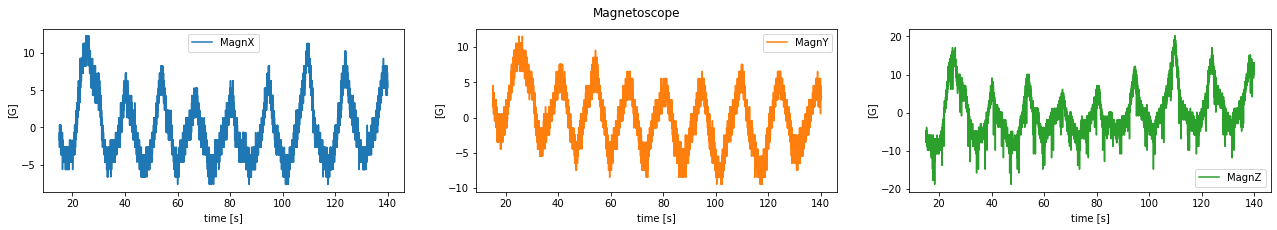

In [8]:
sensor_plot(df2,acc_columns2,'Accelerometer','[mg]')
sensor_plot(df2,gyro_columns2,'Gyroscope','[DPS]')
sensor_plot(df2,magn_columns2,'Magnetoscope','[G]')

In [9]:
def PCA_plot (data_frame, sensor, title, unit,sampling_rate=sampling_rate):
    """
    Helper function to perform PCA using sklearn's routine and plot its results.
    title : string
    unit : string 
    sensor : list of 3 string
    """
    sample_spacing = 1/sampling_rate

    pca=PCA(n_components=2) # initializing a PCA object with maximum number of kept components equal 2
    pca.fit(data_frame[sensor]) #fitting the PCA to selected sensor
    
    sensorT=pca.transform(data_frame[sensor]) # transform data; returns a np.array like (n_samples,n_components)
    
    sensorT_FT1=fft.fft(sensorT[:,0])
    sensorT_FT2=fft.fft(sensorT[:,1])
    sensorT_FT_freq=fft.fftfreq(sensorT[:,0].size,sample_spacing)
    N = int(sensorT_FT_freq.size/2) 
    
    with plt.rc_context({"figure.figsize" : (20,6)}):
        fig,axs = plt.subplots(2,2)
        fig.suptitle(title)
        axs[0,0].plot(data_frame.index,sensorT[:,0],label='First component',color='midnightblue')
        axs[0,0].legend(loc='upper right')
        axs[0,0].set_title("Transformed vector's components projection")
        axs[0,0].set_ylabel(unit)
        axs[0,1].plot(sensorT_FT_freq[:N],np.abs(sensorT_FT1[:N]),color='slateblue')
        axs[0,1].set_title("FT")
        axs[0,1].set_ylabel('power')
        axs[1,0].plot(data_frame.index,sensorT[:,1],label='Second component',color='firebrick')
        axs[1,0].legend(loc='upper right')
        axs[1,0].set_xlabel('time [s]')
        axs[1,0].set_ylabel(unit)
        axs[1,1].plot(sensorT_FT_freq[:N],np.abs(sensorT_FT2[:N]),color='tomato')
        axs[1,1].set_xlabel('frequency [Hz]')
        axs[1,1].set_ylabel('power');

    print('*',title,'\n')
    print("Percentage of variance due to the first component: {:.2%}".format(pca.explained_variance_ratio_[0]))
    print("Percentage of variance due to the second component: {:.2%}".format(pca.explained_variance_ratio_[1]),'\n')

    return sensorT

* Accelerometer PCA 

Percentage of variance due to the first component: 81.27%
Percentage of variance due to the second component: 11.83% 

* Gyroscope PCA 

Percentage of variance due to the first component: 75.30%
Percentage of variance due to the second component: 22.39% 

* Magnetoscope PCA 

Percentage of variance due to the first component: 88.41%
Percentage of variance due to the second component: 10.27% 



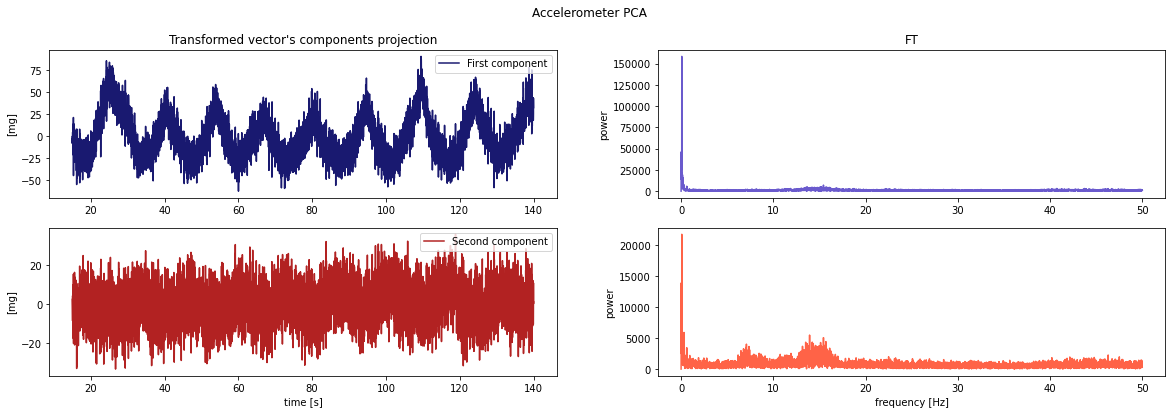

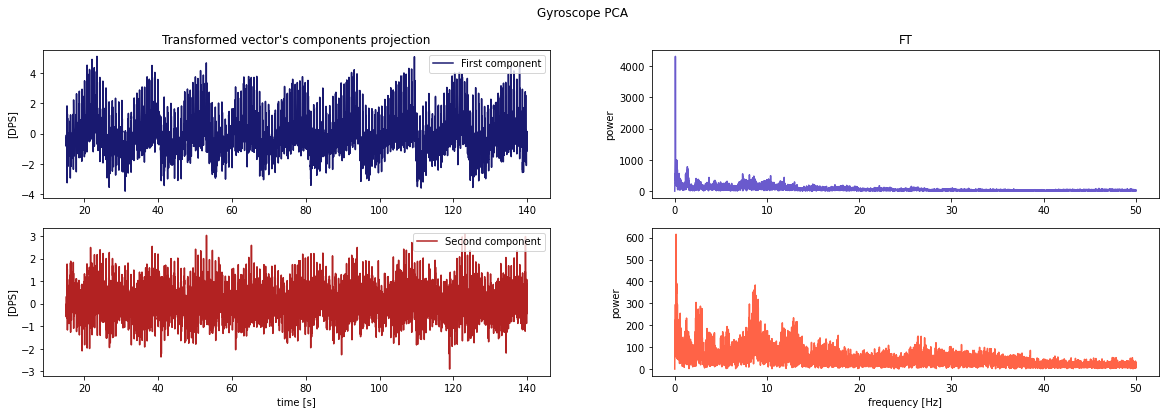

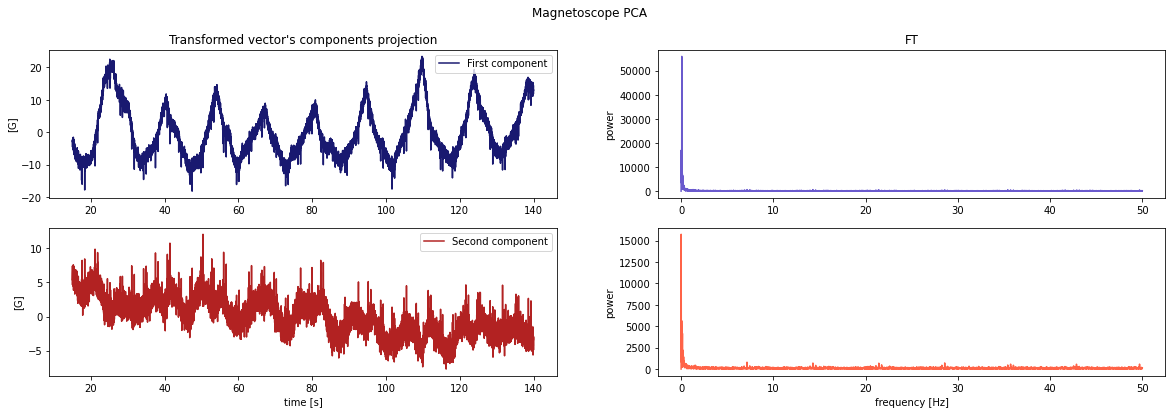

In [10]:
accT2=PCA_plot(df2,acc_columns2,'Accelerometer PCA','[mg]')
gyroT2=PCA_plot(df2,gyro_columns2,'Gyroscope PCA','[DPS]')
magnT2=PCA_plot(df2,magn_columns2,'Magnetoscope PCA','[G]')

In [11]:
minimum_frequency = 0.1 #Hz   <--- WATCH OUT if you use a very low frequency it relates to a very large wavelet bounds so calculation will take a long time
wav = pywt.ContinuousWavelet('morl') # Morlet Wavefunction
print("Central real frequency (Hz): ",pywt.scale2frequency(wav,1)*sampling_rate)
min_scale = pywt.scale2frequency(wav,1)*2
print("Minimum scale factor for a sampling frequency of {} Hz: {}".format(sampling_rate,min_scale))
max_scale = pywt.scale2frequency(wav,1)*sampling_rate/minimum_frequency
print("Maximum scale factor for a frequency of {} Hz: {}".format(minimum_frequency,max_scale))

Central real frequency (Hz):  81.25
Minimum scale factor for a sampling frequency of 100 Hz: 1.625
Maximum scale factor for a frequency of 0.1 Hz: 812.5


In [12]:
def perform_CWT(data_in,wav,min_scale,max_scale,sampling_rate,Nscales=500):
    """
    Wrapper function for pywt.cwt that performs CWT with Nscales different 
    scaling factor, linearly spaced within the [min_scale,max_scale] interval.
    Arguments:
    data_in : np.array() of shape (n_samples) corresponding to the signal to be analyzed
    wav : string with wavelet name or wavelet object
    min_scale : minimum scale factor (related to the maximum frequency analyzed)
    max_scale : maximum scale factor (rel. to minimum frequency)
    sampling_rate : float, representing the signal's sampling rate in Hz
    Nscales : int, defaults to 500. Number of scaling factors used to decompose the signal.

    Returns :
    coefs : np.array() shaped like (n_scales,n_samples)
    scales : np.array() shaped like (n_scales), with each entry scales[i] being the scale factor used in coefs[i,:]
    cwt_freq : np.array() shaped like (n_scales), with the frequencies corresponding to the scale factors used
    """

    scales = np.linspace(min_scale,max_scale,Nscales)# linear scale definition
    # lets try to define a linear spacing in frequency space and transform it
    # scales=pywt.scale2frequency(wav,1)*sampling_rate*(np.linspace(minimum_frequency,sampling_rate/2,Nscales))**(-1)

    coefs, cwt_freq = pywt.cwt(data_in,scales,wav,sampling_period=1/sampling_rate) # result is (n_scales,n_points) np.array. coefs[0,:] are the coefficient for the first scale
                                                                            # which is the smaller one (higher frequency)
                                                                            # cwt_freq is a frequency array, corresponding to the scales array but transformed to a frequency
    return coefs,scales,cwt_freq

def plot_spectrogram(coefs,scales,t_series,name,absolute=True,cmap='viridis',peaks_t=None,peaks_s=None):
    """
    Function that plots the scalogram of the decomposed signal. 
    Plots the scalogram with x axis corresponding to the time-series (works by providing t0 and t1, assuming linearly time spaced samples)
    And y axis corresponding to scale array (assuming linearly spaced scale factors)
    Because of poorly implemented imshow() method of matplotlib.
    Arguments:
    coefs : np.array() shaped like (n_scales,n_samples)
    scales : np.array() shaped like (n_scales), with each entry scales[i] being the scale factor used in coefs[i,:]
    t_series : np.array() shaped like (n_samples), giving the timestamp of each sample
    name : string, representing the name of the signal decomposed
    absolute : bool, defaults to True: whether to consider the absolute value of coefficients or not.
    cmap : defaults to 'viridis', string representing a Matplotlib cmap name
    peaks_t : time-series indices coordinates for peaks found with some algorithm. Defaults to None, only plots them if given
    peaks_s : scales-series indices coordinates for peaks found with some algorithm. Defaults to None, only plots them if given
    """
    if absolute: 
        data = np.abs(coefs)
        cbar_label = 'CWT coefficients (absolute value)'
    else : 
        data = coefs
        cbar_label = 'CWT coefficients'
    fig,ax = plt.subplots(1,1,figsize=[20,8])
    fig.suptitle(name+' CWT scalogram')
    ax.set_ylabel('Wavelet Scale Factor')
    pos = ax.imshow(data,aspect='auto',extent=(t_series[0],t_series[-1],scales[-1],scales[1]),cmap=cmap)
    cbar=fig.colorbar(pos)
    cbar.set_label(cbar_label)
    ax.set_xlabel('Time (s)')

    if not (peaks_t is None) and not (peaks_s is None):
        ax.plot(t_series[peaks_t],scales[peaks_s],'ro')
    plt.show()

In [18]:
data= df2['MagnY']
#data = magnT2[:,0] #second component of magnetic field PCA
coefs,scales,cwt_freq = perform_CWT(data,wav,min_scale,max_scale,sampling_rate)

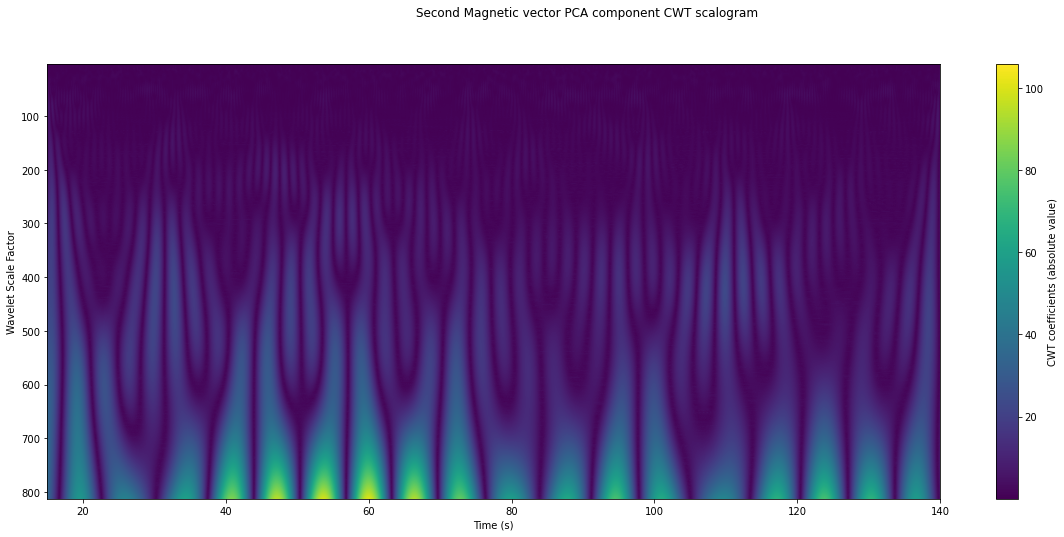

In [19]:
plot_spectrogram(coefs,scales,df2.index,'Second Magnetic vector PCA component')

In [15]:
def return_peaks_coordinates(coefs,min_freq,max_freq,wav,sampling_rate):
    """
    This function takes in a CWT coefficient matrix shaped like (n_scales,n_points) and returns the peaks within a given wavelet C.F. bandwidth.
    coefs : (n_scales,n_points) np.array
    min_freq : float
    max_freq : float
    wav : wavelet name or object
    sampling_rate : float 

    Returns:
    peaks_t,peaks_s : touple of lists containing the temporal index and scale index to identify found peaks in the scalogram matrix
    """

    max_scale = pywt.scale2frequency(wav,1)*sampling_rate/min_freq
    min_scale = pywt.scale2frequency(wav,1)*sampling_rate/max_freq
    scale_range=np.argwhere(np.logical_and(scales < max_scale, scales > min_scale)).reshape(-1) # get the scale range
    mean=np.mean(np.abs(coefs[scale_range,:]),axis=0)
    from scipy import signal
    peaks_t,w=signal.find_peaks(mean,width=100) # get the peaks along temporal axis
    final_peaks_t = np.empty_like(peaks_t)
    final_peaks_s = np.empty_like(peaks_t)
    # print(peaks_t)
    for i,peak_t in enumerate(peaks_t):
        width = 100
        # print("Peak at time t",peak_t)
        max=np.max(np.abs(coefs)[:,peak_t-width:peak_t+width]) # get peaks along scales axis
        max_i=np.where(np.abs(coefs)[:,peak_t-width:peak_t+width]==max) # (scale_max,max_i)
        # print(max,max_i)    
        final_peaks_t[i] = peak_t-100+max_i[1]
        final_peaks_s[i] = max_i[0]
        # print("Coordinates for max {}: scale {} and time {}".format(max,final_peaks_s[i],final_peaks_t[i]))

    return final_peaks_t,final_peaks_s

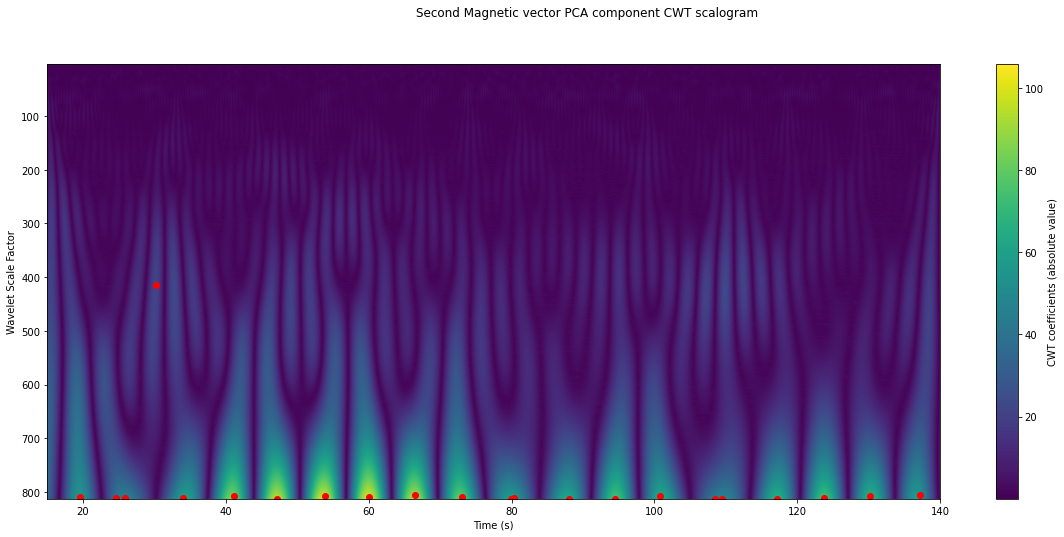

In [20]:
peaks_t,peaks_s = return_peaks_coordinates(coefs,0.1,0.4,wav,sampling_rate) #original 0.1 and 0.4
plot_spectrogram(coefs,scales,df2.index,'Second Magnetic vector PCA component',peaks_t=peaks_t,peaks_s=peaks_s)

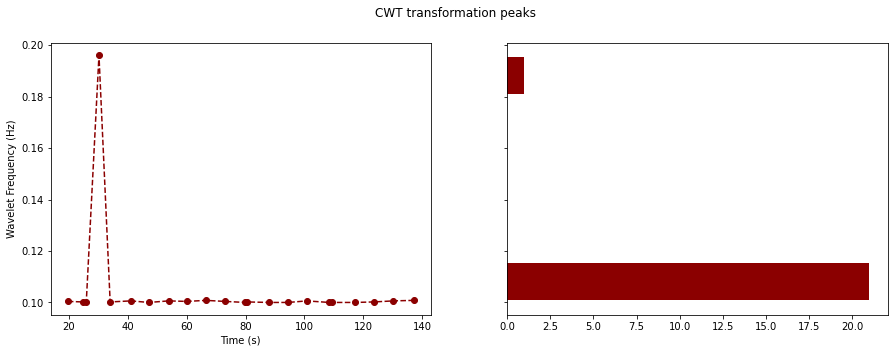

BR estimated via magnetometer: 6.279034485831843 1.1971804513200603


In [21]:
t_p_acc=df2.index[peaks_t]
f_p_acc=[pywt.scale2frequency(wav,scale)*sampling_rate for scale in scales[peaks_s]]


fig,axs = plt.subplots(1,2,figsize=[15,5],sharey=True)
fig.suptitle("CWT transformation peaks")

axs[0].set_ylabel("Wavelet Frequency (Hz)")
axs[0].set_xlabel("Time (s)")
axs[0].plot(t_p_acc,f_p_acc,linestyle='--',marker='o',color='darkred')
axs[1].hist(f_p_acc,6,orientation='horizontal',rwidth=0.9,color='darkred')
plt.show();

BR_acc=np.mean(f_p_acc)*60
error_BR_acc=np.std(f_p_acc)*60
print('BR estimated via magnetometer:',BR_acc,error_BR_acc)